## Итоговая работа по модулю "Feature engineering" от 17.11.2019 г.
ФИО: Кривова Татьяна Сергеевна

Представлены данные такси, по которым мы должны предсказать возьмёт ли таксист заказ или нет(driver_response).

**1. Загружаю датасет taxi.csv, смотрю основную информацию по атрибутам.**

In [1]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
raw_data = pd.read_csv('taxi.csv') # raw_data.shape --> (100000, 14)

In [3]:
# Посмотрим на данные и общую информацию по признакам:
raw_data.info()
raw_data.head(10)

# 13 признаков и целевая переменная - driver_response
# в 12-ти столбцах числа, в 2-х столбцах текстовая информация - offer_class_group, ride_type_desc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
offer_gk                  100000 non-null int64
weekday_key               100000 non-null int64
hour_key                  100000 non-null int64
driver_gk                 100000 non-null int64
order_gk                  100000 non-null int64
driver_latitude           100000 non-null float64
driver_longitude          100000 non-null float64
origin_order_latitude     100000 non-null float64
origin_order_longitude    100000 non-null float64
distance_km               100000 non-null float64
duration_min              100000 non-null float64
offer_class_group         100000 non-null object
ride_type_desc            100000 non-null object
driver_response           100000 non-null int64
dtypes: float64(6), int64(6), object(2)
memory usage: 9.9+ MB


,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1
5,1058203,6,15,6080,360328,55.818963,37.361033,55.814827,37.354074,6.747,9.800,Economy,private,0
6,103326,2,11,6080,615584,55.753508,37.663742,55.757251,37.659064,-1.000,-1.000,Standard,business,1
7,128861,5,20,6080,254374,55.839318,37.248862,55.839134,37.304101,1.517,3.933,Economy,private,0
8,493006,5,20,6080,753429,55.818748,37.338240,55.835764,37.294710,6.222,15.433,Economy,private,0
9,953983,6,7,6080,533820,55.839155,37.251947,55.833198,37.312197,10.410,23.083,Economy,private,0


In [4]:
raw_data.isna().sum() # Количество отсутствующих значений в каждом столбце

# Вывод: отсутствующих значений (Nan элементов) нет.

offer_gk                  0
weekday_key               0
hour_key                  0
driver_gk                 0
order_gk                  0
driver_latitude           0
driver_longitude          0
origin_order_latitude     0
origin_order_longitude    0
distance_km               0
duration_min              0
offer_class_group         0
ride_type_desc            0
driver_response           0
dtype: int64

In [5]:
# Посмотрим основные статистики для атрибутов:
raw_data.describe()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.662189e+05,3.159860,13.827790,3446.376360,460867.01291,55.700824,37.492292,55.772440,37.541637,18.393518,23.134841,0.492480
std,3.259360e+05,2.054222,7.306496,2038.738677,266064.98953,2.135903,1.454640,0.665985,0.467758,41.129296,33.890105,0.499946
min,4.000000e+00,0.000000,0.000000,14.000000,18.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.855552e+05,1.000000,8.000000,1421.000000,229178.50000,55.708651,37.413497,55.708032,37.407117,-1.000000,-1.000000,0.000000
50%,5.656715e+05,3.000000,16.000000,3506.500000,462420.00000,55.772904,37.533664,55.772561,37.532537,10.411500,19.700000,0.000000
75%,8.487198e+05,5.000000,20.000000,5242.000000,690894.00000,55.960667,37.624113,55.962000,37.624358,30.665250,37.867000,1.000000
max,1.130355e+06,6.000000,23.000000,6806.000000,920344.00000,56.174097,38.280547,56.311121,38.243608,5234.283000,3958.283000,1.000000


In [6]:
raw_data[['offer_class_group', 'ride_type_desc']].mode()

,offer_class_group,ride_type_desc
0,Economy,private


**2. Посмотрим информацию о содержимом датасета.**

Подробный отчет по датасету ProfileReport на этом объеме данных не сработал. Исследую данные в каждом столбце, результаты  записываю ниже:

In [7]:
# стратегия преобразования категориальных признаков описана ниже

Атрибуты:

* **driver_response (target variable)**: имеет дискретное распределение (Бернулли), значения в столбце - классы ответов: 0 и 1, которые нужно предсказать. Количество элементов в классах: 0 - 50752 (50,8% от общего количества значений), 1 - 49248 (49,2% от общего количества значений). Имеем небольшую несбалансированность классов по количеству элементов.


* **offer_gk**: unique offer identifier. Имеет равномерное распределение, значения в столбце - 100000 уникальных чисел. Судя по графику, не имеет влияния на driver_response. Кандидат на удаление. 

* **weekday_key**: категориальная переменная, обозначающая номер дня недели. Значения в столбце - числа от 0 до 6. Судя по графику распределения, большее число элементов имеют дни "5", "6" и "0": 5 - 19284, 6 - 15466, 0 - 14411, 4 - 13290, 1 - 13089, 2 - 12859, 3 - 11601. Предполагаю, что "6" и "0" обозначают субботу и воскресенье, можно создать новый признак is_weekend. Предполагаю, что "5" обозначает пятницу, можно создать новый признак is_friday.   

* **hour_key**: номер часа в сутках. Значения в столбце - числа от 0 до 23. Судя по графику распределения, большее число элементов имеют вечерние часы: 23 - 8184, 21 - 7398, 22 - 6881, 0 - 6646, 20 - 6566. Можно создать новые признаки, обозначающие интервалы времени в сутках. Например, 00:00 - 03:59 — is_night; 04:00 - 11:59 — is_morning; 12:00 - 16:59 — is_daytime; 17:00 - 23:59 — is_evening.

* **driver_gk**: unique driver identifier. В датасете 439 уникальных водителей. При этом, у них существенно разная активность: у некоторых водителей более 2000 элементов, а у других чуть более 50 элементов. Можно создать новые признаки, обозначающие активность водителя в системе. Например, PERFORMANCE_category (top, high, medium, bottom, low) и воспользоваться one-hot-encoding для преобразования данного столбца.

* **order_gk**: unique order identifier (INT). Order may have multiple offers. В столбце 81435 уникальных чисел. При этом, у них различается количество элементов: у некоторых order более 10 элементов, а у других 1 элемент. Можно создать новые признаки, обозначающие популярность order в системе.

* **driver_latitude, driver_longitude** : широта и долгота водителя. Представим элементы как векторы в двумерном пространстве "Широта - Долгота" и посмотрим совместно аналогичные параметры driver и order. У 141 элемента значения в этих столбцах значение -1, т.е. отсутствует информация о позиции водителя - можно создать новый признак или удалить. Судя по графикам boxplot, есть выбросы.

* **origin_order_latitude, origin_order_longitude** : широта и долгота начала заказа. У 13 элементов в этих столбцах значение -1, т.е. отсутствует информация о позиции заказа - можно создать новый признак или удалить. Судя по графикам boxplot, у переменной origin_order_longitude есть выбросы. Можно создать новые признаки: косинус угла между векторами и расстояние между точками положения водителя и места заказа.

* **distance_km**: estimated distance from origin to destination in kilometres (FLOAT). Value -1 means that the destination is not set. Большое количество элементов, у которых не определено расстояние (значение -1) 26207 (26,2% от общего количества значений); а также 152 элемента, у которых значение 0. Медиана: 10.4, Q3: 30.7. В датасете есть очень длительные поездки: 38 шт. более 500 км, 339 шт. более 90 км - исключаем их.
 
* **duration_min**: estimated duration from origin to destination in minutes (FLOAT). Value -1 means that the destination is not set. Большое количество элементов, у которых не определена длительность (значение -1) 26207 (26,2% от общего количества значений); а также 152 элемента, у которых значение 0. Медиана: 19.7, Q3: 37.9. В датасете есть очень длительные поездки: 34 шт. более 500 мин., 197 шт. более 90 мин. - исключаем их.

* **offer_class_group**: В датасете 9 уникальных категорий заказов, при этом на топ-4 категории приходится 98,7% от всех элементов: Economy-48335, Standard-47288, Premium-1773, Delivery-1290. Можно ограничиться этими категориями и воспользоваться one-hot-encoding для преобразования данного столбца, получим 4 новых признака.

* **ride_type_desc**: В датасете 4 уникальные типа поездки, при этом на топ-2 категории приходится 99,7% от всех элементов: private-91207, business-8533. Можно ограничиться этими категориями и воспользоваться one-hot-encoding для преобразования данного столбца, получим 2 новых признака.

In [8]:
# Начинаю с целевой переменной - столбец driver_response.

raw_data.driver_response.unique()
raw_data.driver_response.value_counts()

array([0, 1], dtype=int64)

0    50752
1    49248
Name: driver_response, dtype: int64

Text(0.5, 1.0, 'График для параметра driver_response')

Text(0.5, 0, 'Класс ответа')

Text(0, 0.5, 'Количество элементов')

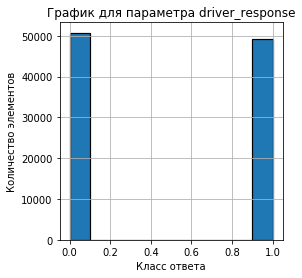

In [9]:
rcParams['figure.figsize'] = 4,4

raw_data.driver_response.hist(edgecolor='black', linewidth=1.2)

plt.title('График для параметра driver_response')
plt.xlabel('Класс ответа')
plt.ylabel('Количество элементов')

In [10]:
# Далее пройдемся последовательно по всем столбцам.
# offer_gk

len(raw_data.offer_gk.unique())

100000

(array([ 9920.,  9849., 10040., 10077., 10078.,  9919.,  9974., 10167.,
         9911., 10065.]),
 array([4.0000000e+00, 1.1303910e+05, 2.2607420e+05, 3.3910930e+05,
        4.5214440e+05, 5.6517950e+05, 6.7821460e+05, 7.9124970e+05,
        9.0428480e+05, 1.0173199e+06, 1.1303550e+06]),
 <a list of 10 Patch objects>)

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Графики для параметра offer_gk: гистограмма и влияние на driver_response')

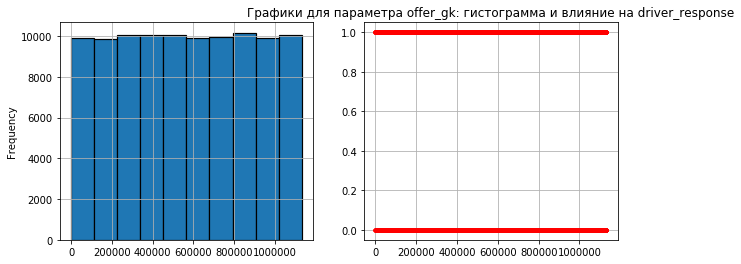

In [11]:
rcParams['figure.figsize'] = 10,4
fig = plt.figure() # Графики для параметра offer_gk

ax1 = fig.add_subplot(1,2,1)
ax1.hist(raw_data.offer_gk, bins=10, edgecolor='black', linewidth=1.2)
ax1.grid(True)
plt.ylabel('Frequency')

ax2 = fig.add_subplot(1,2,2)
ax2.plot(raw_data.offer_gk, raw_data.driver_response, 'r.')
ax2.grid(True)

plt.title('Графики для параметра offer_gk: гистограмма и влияние на driver_response')
plt.show()

In [12]:
# weekday_key

len(raw_data.weekday_key.unique())
raw_data.weekday_key.unique()
raw_data.weekday_key.value_counts()

7

array([5, 6, 2, 4, 3, 1, 0], dtype=int64)

5    19284
6    15466
0    14411
4    13290
1    13089
2    12859
3    11601
Name: weekday_key, dtype: int64

Text(0.5, 1.0, 'График для параметра weekday_key')

Text(0.5, 0, 'Номер дня')

Text(0, 0.5, 'Количество элементов')

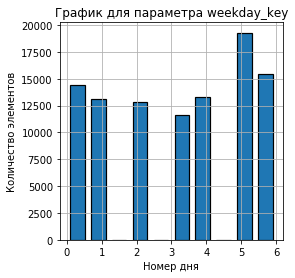

In [13]:
rcParams['figure.figsize'] = 4,4

raw_data.weekday_key.hist(edgecolor='black', linewidth=1.2, align='mid', rwidth=0.7)

plt.title('График для параметра weekday_key')
plt.xlabel('Номер дня')
plt.ylabel('Количество элементов')

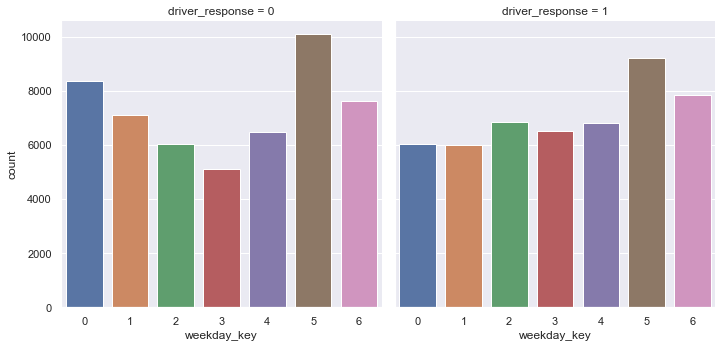

In [14]:
# Распределение откликов водителей по дням недели (sns.catplot)

sns.set(style="darkgrid")
sns.catplot(x="weekday_key", data=raw_data, col="driver_response", kind="count")

In [15]:
# hour_key

len(raw_data.hour_key.unique())
raw_data.hour_key.unique()
raw_data.hour_key.value_counts()

24

array([20, 14,  6, 16, 15, 11,  7, 10, 12,  8,  9, 21, 17, 23, 13, 18,  5,
       19, 22,  0,  2,  3,  1,  4], dtype=int64)

23    8184
21    7398
22    6881
0     6646
20    6566
19    6369
18    5889
17    5028
16    4500
15    4249
14    3584
8     3550
1     3467
13    3355
9     3298
12    3169
11    2890
10    2840
7     2482
2     2275
4     2193
5     1809
3     1768
6     1610
Name: hour_key, dtype: int64

Text(0.5, 1.0, 'График для параметра hour_key')

Text(0.5, 0, 'Номер часа')

Text(0, 0.5, 'Количество элементов')

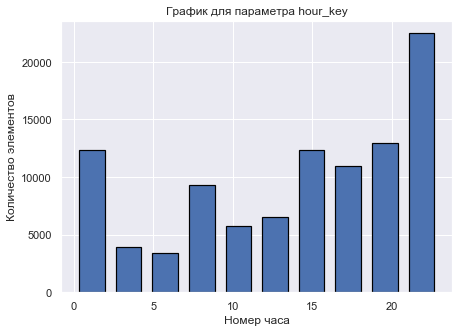

In [16]:
rcParams['figure.figsize'] = 7,5

raw_data.hour_key.hist(edgecolor='black', linewidth=1.2, align='mid', rwidth=0.7)

plt.title('График для параметра hour_key')
plt.xlabel('Номер часа')
plt.ylabel('Количество элементов')

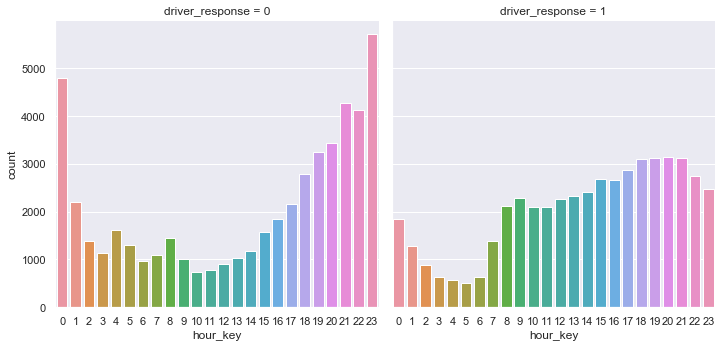

In [17]:
# Распределение откликов водителей по часам заказа (sns.catplot)

sns.set(style="darkgrid")
sns.catplot(x="hour_key", data=raw_data, col="driver_response", kind="count")

In [18]:
# driver_gk

len(raw_data.driver_gk.unique())
raw_data.driver_gk.value_counts()

439

1421    3014
1060    2780
1126    2328
4490    1784
2442    1588
        ... 
2844      52
1978      52
689       52
854       51
3242      50
Name: driver_gk, Length: 439, dtype: int64

Text(0.5, 1.0, 'График для параметра driver_gk')

Text(0.5, 0, 'Уникальный номер водителя')

Text(0, 0.5, 'Количество элементов')

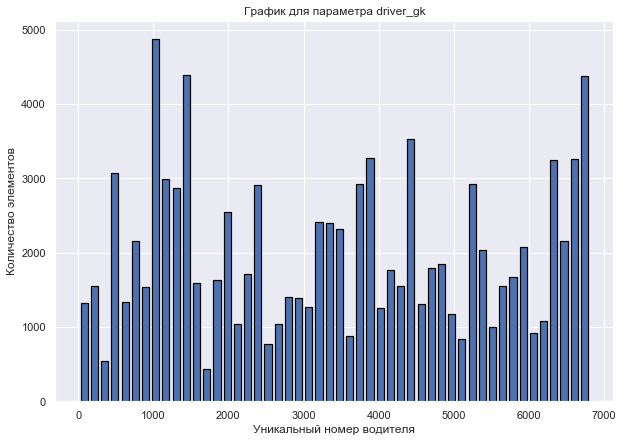

In [19]:
rcParams['figure.figsize'] = 10,7

raw_data.driver_gk.hist(bins=50, edgecolor='black', linewidth=1.2, align='mid', rwidth=0.7)

plt.title('График для параметра driver_gk')
plt.xlabel('Уникальный номер водителя')
plt.ylabel('Количество элементов')

In [20]:
productivity_df = pd.DataFrame({'driver_gk':raw_data.driver_gk.value_counts().index, 'working_times':raw_data.driver_gk.value_counts().values})

productivity_df.head()
productivity_df.shape

,driver_gk,working_times
0,1421,3014
1,1060,2780
2,1126,2328
3,4490,1784
4,2442,1588


(439, 2)

In [21]:
spisok = []
for element in productivity_df['working_times']:
    if element >= 1250: spisok.append('top')
    elif element >= 600: spisok.append('high')
    elif element > 250: spisok.append('medium')       
    elif element <= 90: spisok.append('bottom')
    elif element <= 250: spisok.append('low')
        
productivity_df['PERFORMANCE_category'] = pd.Series(spisok)
len(spisok)
productivity_df.head()

439

,driver_gk,working_times,PERFORMANCE_category
0,1421,3014,top
1,1060,2780,top
2,1126,2328,top
3,4490,1784,top
4,2442,1588,top


In [22]:
# order_gk

len(raw_data.order_gk.unique())
raw_data.order_gk.value_counts()

81435

853342    14
714527    13
761031    13
828548    12
180487    12
          ..
529767     1
361705     1
57063      1
782999     1
786432     1
Name: order_gk, Length: 81435, dtype: int64

In [23]:
popularity_df = pd.DataFrame({'order_gk':raw_data.order_gk.value_counts().index, 'counter':raw_data.order_gk.value_counts().values})

popularity_df.head()
popularity_df.shape

,order_gk,counter
0,853342,14
1,714527,13
2,761031,13
3,828548,12
4,180487,12


(81435, 2)

In [24]:
spisok = []
for element in popularity_df['counter']:
    if element >= 10: spisok.append('top')
    elif element >= 4: spisok.append('high')
    elif element >= 2: spisok.append('medium')
    elif element == 1: spisok.append('bottom')
        
popularity_df['POPULARITY_category'] = pd.Series(spisok)
len(spisok)
popularity_df.head()

81435

,order_gk,counter,POPULARITY_category
0,853342,14,top
1,714527,13,top
2,761031,13,top
3,828548,12,top
4,180487,12,top


(57259, 59906)

Text(0.5, 0, 'driver_latitude')

Text(0, 0.5, 'driver_longitude')

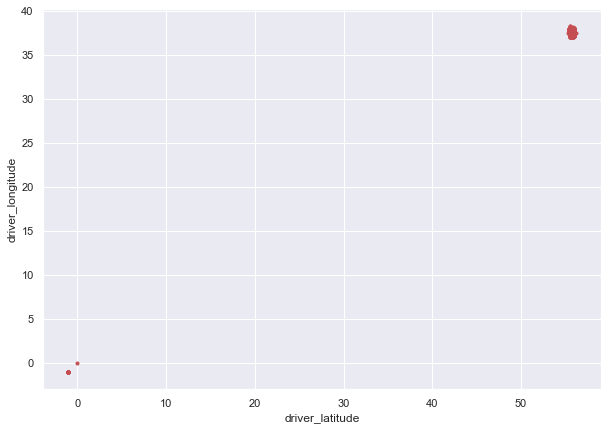

In [25]:
# driver_latitude и driver_longitude 

len(raw_data.driver_latitude.unique()), len(raw_data.driver_longitude.unique())

plt.plot(raw_data.driver_latitude, raw_data.driver_longitude, 'r.')
plt.xlabel('driver_latitude')
plt.ylabel('driver_longitude')

In [26]:
raw_data[raw_data.driver_latitude < 10][['driver_latitude', 'driver_longitude']].head()
raw_data[raw_data.driver_latitude < 10][['driver_latitude', 'driver_longitude']].shape

# У 141 элемента отсутствует информация о позиции водителя.

,driver_latitude,driver_longitude
565,-1.0,-1.0
2111,-1.0,-1.0
2129,-1.0,-1.0
2137,-1.0,-1.0
2142,-1.0,-1.0


(141, 2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0D0D49F0>,
      dtype=object)

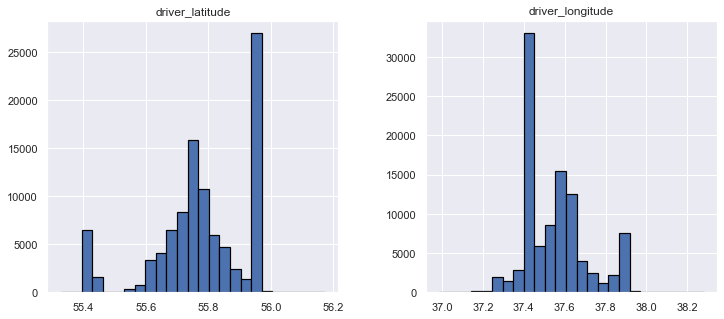

In [27]:
rcParams['figure.figsize'] = 12,5

raw_data[raw_data.driver_latitude > 10][['driver_latitude', 'driver_longitude']].hist(bins=25, edgecolor='black', linewidth=1.2)

Text(0.5, 0, 'driver_latitude')

Text(0, 0.5, 'driver_longitude')

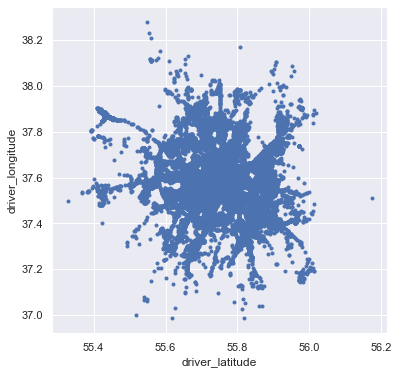

In [28]:
rcParams['figure.figsize'] = 6,6

plt.plot(raw_data[raw_data.driver_latitude > 10].driver_latitude, raw_data[raw_data.driver_latitude > 10].driver_longitude, 'b.')
plt.xlabel('driver_latitude')
plt.ylabel('driver_longitude')

Text(0.5, 1.0, 'График ящик с усами для параметров driver_latitude и driver_longitude (sns.boxplot)')

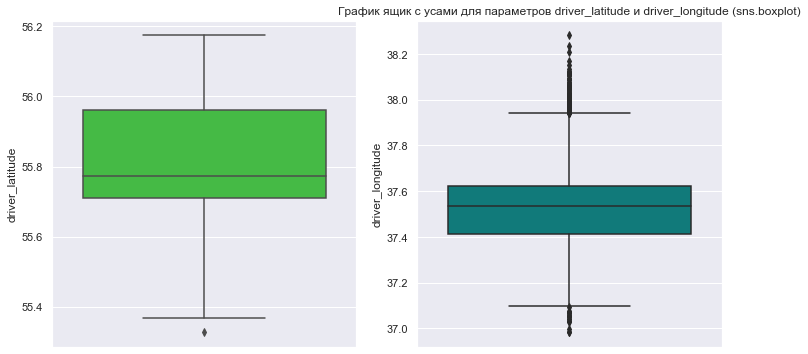

In [29]:
rcParams['figure.figsize'] = 12,6
fig = plt.figure() # Графики для параметров driver_latitude и driver_longitude

ax1 = fig.add_subplot(1,2,1)
sns.boxplot(y=raw_data[raw_data.driver_latitude > 10].driver_latitude, color="limegreen")

ax2 = fig.add_subplot(1,2,2)
sns.boxplot(y=raw_data[raw_data.driver_latitude > 10].driver_longitude, color="darkcyan")

plt.title('График ящик с усами для параметров driver_latitude и driver_longitude (sns.boxplot)')
plt.show()

# Вывод: есть выбросы.

(32925, 33646)

Text(0.5, 0, 'origin_order_latitude')

Text(0, 0.5, 'origin_order_longitude')

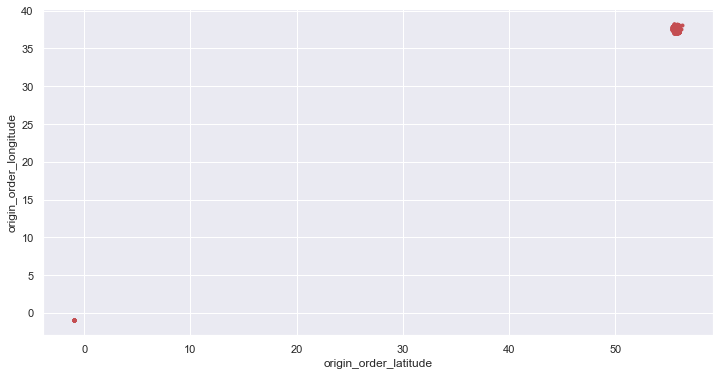

In [30]:
# origin_order_latitude, origin_order_longitude

len(raw_data.origin_order_latitude.unique()), len(raw_data.origin_order_longitude.unique())

plt.plot(raw_data.origin_order_latitude, raw_data.origin_order_longitude, 'r.')
plt.xlabel('origin_order_latitude')
plt.ylabel('origin_order_longitude')

In [31]:
raw_data[raw_data.origin_order_latitude < 10][['origin_order_latitude', 'origin_order_longitude']].head()

raw_data[raw_data.origin_order_latitude < 10][['origin_order_latitude', 'origin_order_longitude']].shape
# У 13 элементов отсутствует информация о позиции заказа.

,origin_order_latitude,origin_order_longitude
1687,-1.0,-1.0
9407,-1.0,-1.0
43328,-1.0,-1.0
43688,-1.0,-1.0
51365,-1.0,-1.0


(13, 2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0B78B190>,
      dtype=object)

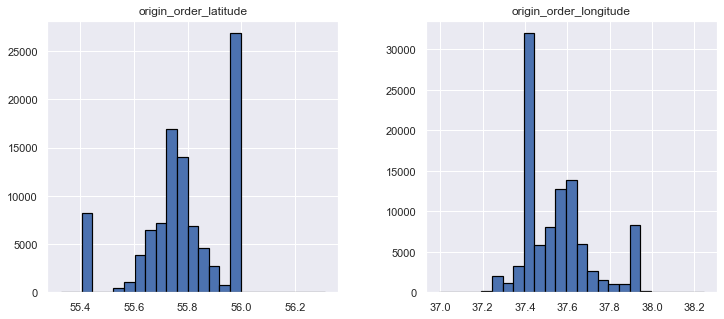

In [32]:
rcParams['figure.figsize'] = 12,5

raw_data[raw_data.origin_order_latitude > 10][['origin_order_latitude', 'origin_order_longitude']].hist(bins=25, edgecolor='black', linewidth=1.2)

Text(0.5, 0, 'origin_order_latitude')

Text(0, 0.5, 'origin_order_longitude')

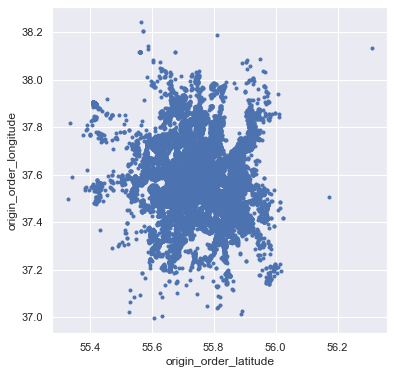

In [33]:
rcParams['figure.figsize'] = 6,6

plt.plot(raw_data[raw_data.origin_order_latitude > 10].origin_order_latitude, raw_data[raw_data.origin_order_latitude > 10].origin_order_longitude, 'b.')
plt.xlabel('origin_order_latitude')
plt.ylabel('origin_order_longitude')

Text(0.5, 1.0, 'График ящик с усами для параметров origin_order_latitude и origin_order_longitude (sns.boxplot)')

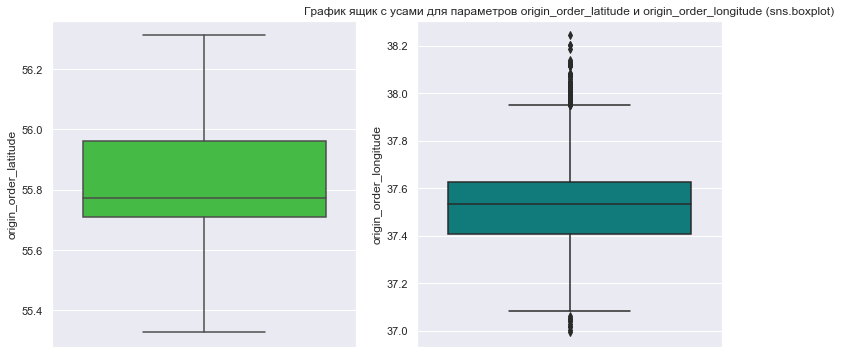

In [34]:
rcParams['figure.figsize'] = 12,6
fig = plt.figure() # Графики для параметров origin_order_latitude и origin_order_longitude

ax1 = fig.add_subplot(1,2,1)
sns.boxplot(y=raw_data[raw_data.origin_order_latitude > 10].origin_order_latitude, color="limegreen")

ax2 = fig.add_subplot(1,2,2)
sns.boxplot(y=raw_data[raw_data.origin_order_latitude > 10].origin_order_longitude, color="darkcyan")

plt.title('График ящик с усами для параметров origin_order_latitude и origin_order_longitude (sns.boxplot)')
plt.show()

# Вывод: есть выбросы.

In [35]:
# Представим элементы как векторы в двумерном пространстве "Широта - Долгота".
# Посмотрим совместно аналогичные параметры driver и order для элемента с произвольным индексом.

v1 = np.array([raw_data.driver_latitude[23575], raw_data.driver_longitude[23575]])
v2 = np.array([raw_data.origin_order_latitude[23575], raw_data.origin_order_longitude[23575]])

v1
v2

print(f'Скалярное произведение: {np.dot(v1, v2)}')

array([55.750662, 37.958257])

array([55.743759, 38.000853])

Скалярное произведение: 4550.197611011679


Text(0.5, 1.0, 'Координаты водителя и заказа как векторы в выбранном 2D пространстве (latitude, longitude)')

Text(0.5, 0, 'latitude')

Text(0, 0.5, 'longitude')

(55, 56)

(37, 39)

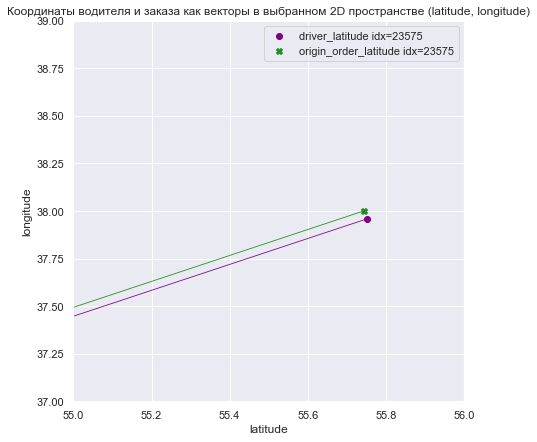

In [36]:
rcParams['figure.figsize'] = 7,7

plt.scatter(v1[0], v1[1], c="purple", marker="o", label='driver_latitude idx=23575')
plt.scatter(v2[0], v2[1], c='forestgreen', marker='X', label='origin_order_latitude idx=23575')

plt.plot([0,v1[0]], [0, v1[1]], color="purple", marker=None, linewidth=0.8)
plt.plot([0,v2[0]], [0, v2[1]], color="forestgreen", marker=None, linewidth=0.8)

plt.title('Координаты водителя и заказа как векторы в выбранном 2D пространстве (latitude, longitude)')
plt.xlabel('latitude')
plt.ylabel('longitude')

plt.xlim(55, 56)
plt.ylim(37, 39)

plt.grid(True)
plt.legend()

In [37]:
v1Length = np.linalg.norm(v1)
v2Length = np.linalg.norm(v2)

cosine = np.dot(v1,v2)/(v1Length*v2Length)
cosine # косинус угла между векторами - кандидат в новый признак

np.arccos(cosine) * 180/np.pi # угол между векторами в градусах

distance = math.hypot(v2[0] - v1[0], v2[1] - v1[1])
distance # расстояние между точками - кандидат в новый признак

0.999999832097364

0.03320216424043007

0.04315171636215277

In [38]:
# distance_km

len(raw_data.distance_km.unique())
raw_data.distance_km.value_counts()

31297

-1.000     26207
 0.000       152
 7.718        39
 56.447       35
 11.014       32
           ...  
 1.530         1
 39.895        1
 25.843        1
 18.259        1
 0.674         1
Name: distance_km, Length: 31297, dtype: int64

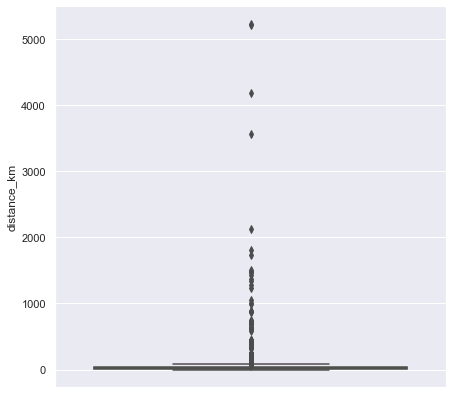

In [39]:
sns.boxplot(y=raw_data[raw_data.distance_km > 0].distance_km, color="limegreen")

In [40]:
len(raw_data[raw_data.distance_km >= 500])
len(raw_data[raw_data.distance_km >= 90])

38

339

Text(0.5, 1.0, 'График для параметра distance_km')

Text(0.5, 0, 'distance_km')

Text(0, 0.5, 'Количество элементов')

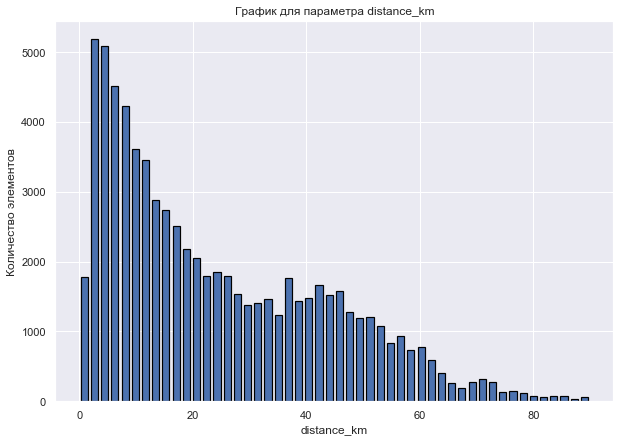

In [41]:
rcParams['figure.figsize'] = 10,7

raw_data.query('distance_km > 0 & distance_km < 90').distance_km.hist(bins=50, edgecolor='black', linewidth=1.2, align='mid', rwidth=0.7)

plt.title('График для параметра distance_km')
plt.xlabel('distance_km')
plt.ylabel('Количество элементов')

In [42]:
# duration_min

len(raw_data.duration_min.unique())
raw_data.duration_min.value_counts()

4728

-1.000     26207
 0.000       152
 21.467       65
 56.833       64
 23.333       56
           ...  
 98.500        1
 59.750        1
 77.817        1
 93.850        1
 82.750        1
Name: duration_min, Length: 4728, dtype: int64

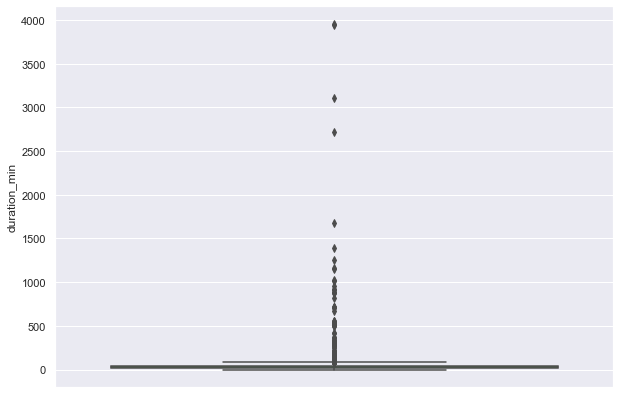

In [43]:
sns.boxplot(y=raw_data[raw_data.duration_min > 0].duration_min, color="limegreen")

In [44]:
len(raw_data[raw_data.duration_min >= 500])
len(raw_data[raw_data.duration_min >= 90])

34

197

Text(0.5, 1.0, 'График для параметра duration_min')

Text(0.5, 0, 'duration_min')

Text(0, 0.5, 'Количество элементов')

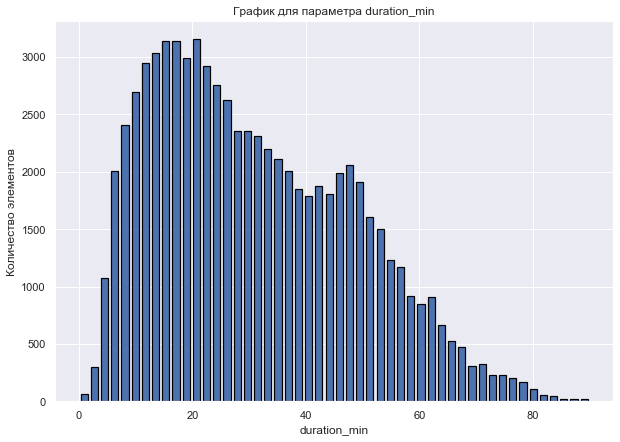

In [45]:
rcParams['figure.figsize'] = 10,7

raw_data.query('duration_min > 0 & duration_min < 90').duration_min.hist(bins=50, edgecolor='black', linewidth=1.2, align='mid', rwidth=0.7)

plt.title('График для параметра duration_min')
plt.xlabel('duration_min')
plt.ylabel('Количество элементов')

In [46]:
# offer_class_group

len(raw_data.offer_class_group.unique())
raw_data.offer_class_group.unique()
raw_data.offer_class_group.value_counts()

9

array(['Economy', 'Standard', 'XL', 'Kids', 'Delivery', 'Test', 'Premium',
       'VIP', 'VIP+'], dtype=object)

Economy     48335
Standard    47288
Premium      1773
Delivery     1290
Kids          588
XL            464
VIP           225
VIP+           29
Test            8
Name: offer_class_group, dtype: int64

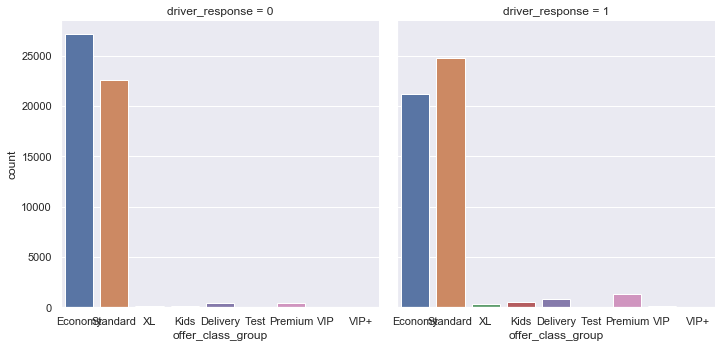

In [47]:
# Распределение откликов водителей по классам заказов (sns.catplot)

sns.set(style="darkgrid")
sns.catplot(x="offer_class_group", data=raw_data, col="driver_response", kind="count")

In [48]:
# ride_type_desc

len(raw_data.ride_type_desc.unique())
raw_data.ride_type_desc.unique()
raw_data.ride_type_desc.value_counts()

4

array(['private', 'business', 'affiliate', 'SMB'], dtype=object)

private      91207
business      8533
affiliate      224
SMB             36
Name: ride_type_desc, dtype: int64

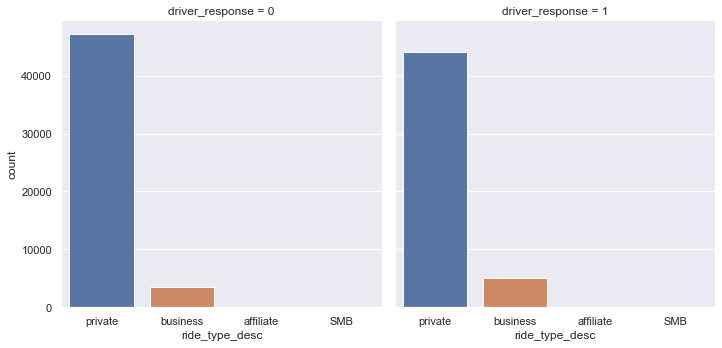

In [49]:
# Распределение откликов водителей по типам заказа (sns.catplot)

sns.set(style="darkgrid")
sns.catplot(x="ride_type_desc", data=raw_data, col="driver_response", kind="count")

**3. Оцените зависимости переменных между собой. Используйте корреляции.**

In [51]:
correlations = raw_data.corr() # Матрица корреляций до преобразования данных
correlations.style.background_gradient(cmap='coolwarm').set_precision(3)

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response
offer_gk,1,-0.00451,-0.00695,0.00147,0.00333,-0.00308,-0.00362,-0.00547,-0.00678,-0.00237,-0.00226,0.00516
weekday_key,-0.00451,1,0.0479,0.0111,0.000738,-0.00023,0.00648,-0.0105,0.0101,-0.0293,-0.0305,0.0386
hour_key,-0.00695,0.0479,1,-0.0374,0.00616,0.000306,-0.00699,0.00816,-0.0162,-0.0209,-0.0262,0.0195
driver_gk,0.00147,0.0111,-0.0374,1,-0.00414,-0.0269,-0.00412,-0.0316,0.0428,-0.00958,-0.00408,0.0157
order_gk,0.00333,0.000738,0.00616,-0.00414,1,0.00452,0.00326,0.00554,0.00128,0.00212,0.0032,0.00166
driver_latitude,-0.00308,-0.00023,0.000306,-0.0269,0.00452,1,0.986,0.0316,-0.0365,0.0103,0.016,-0.0519
driver_longitude,-0.00362,0.00648,-0.00699,-0.00412,0.00326,0.986,1,-0.00332,0.0171,0.0134,0.0233,-0.0198
origin_order_latitude,-0.00547,-0.0105,0.00816,-0.0316,0.00554,0.0316,-0.00332,1,0.857,-0.0009,-0.00591,-0.0494
origin_order_longitude,-0.00678,0.0101,-0.0162,0.0428,0.00128,-0.0365,0.0171,0.857,1,0.00974,0.0183,0.0532
distance_km,-0.00237,-0.0293,-0.0209,-0.00958,0.00212,0.0103,0.0134,-0.0009,0.00974,1,0.977,-0.141


E:\Python_programming\Tatiana Python2_Specialist_30-07-2019\python-29-07\python\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()
E:\Python_programming\Tatiana Python2_Specialist_30-07-2019\python-29-07\python\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()


Text(0.5, 1, 'Матрица корреляции в виде тепловой карты (sns.heatmap)')

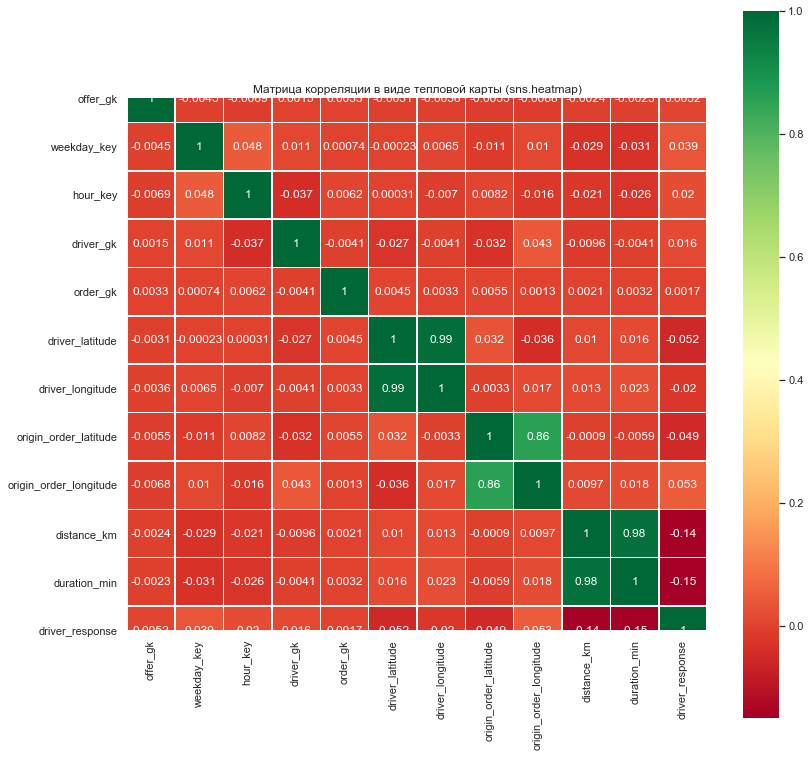

In [52]:
rcParams['figure.figsize'] = 13,13
sns.heatmap(correlations, annot=True,linewidths=.5, square=True, cmap="RdYlGn")

plt.title('Матрица корреляции в виде тепловой карты (sns.heatmap)', fontsize=12)

Выводы: нет признаков, имеющих существенную корреляцию (> 50%) с целевой переменной driver_response.
Наибольшая корреляция у следующих признаков:
0.986 : driver_latitude	и driver_longitude; 
0.977 : distance_km	и duration_min;
0.857 : origin_order_latitude и origin_order_longitude. 
Будем учитывать это при преобразовании данных.

**4. Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалите лишние, при необходимости.**

In [53]:
model_df = raw_data[['driver_response', 'weekday_key', 'hour_key', 'driver_gk', 'order_gk', 'driver_latitude', 'driver_longitude', 'origin_order_latitude', 'origin_order_longitude', 'distance_km', 'duration_min', 'offer_class_group', 'ride_type_desc']]

model_df.head()
model_df.shape

,driver_response,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc
0,0,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private
1,1,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private
2,0,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private
3,1,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private
4,1,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private


(100000, 13)

In [54]:
def weekend_classification(num):
    if num == 6 or num == 0: return 1
    else: return 0
    
def friday_classification(num):
    if num == 5: return 1
    else: return 0

In [55]:
model_df["is_weekend"] = model_df["weekday_key"].apply(weekend_classification)
model_df["is_friday"] = model_df["weekday_key"].apply(friday_classification)

In [56]:
def time_night_classification(num): # 00:00 - 03:59 — is_night
    night = [0, 1, 2, 3]
    if num in night: return 1
    else: return 0
    
def time_morning_classification(num): # 04:00 - 11:59 — is_morning
    morning = [4, 5, 6, 7, 8, 9, 10, 11]
    if num in morning: return 1
    else: return 0
    
def time_daytime_classification(num): # 12:00 - 16:59 — is_daytime
    daytime = [12, 13, 14, 15, 16]
    if num in daytime: return 1
    else: return 0    
    
def time_evening_classification(num): # 17:00 - 23:59 — is_evening
    evening = [17, 18, 19, 20, 21, 22, 23]
    if num in evening: return 1
    else: return 0

In [57]:
model_df["is_night"] = model_df["hour_key"].apply(time_night_classification)
model_df["is_morning"] = model_df["hour_key"].apply(time_morning_classification)
model_df["is_daytime"] = model_df["hour_key"].apply(time_daytime_classification)
model_df["is_evening"] = model_df["hour_key"].apply(time_evening_classification)

In [58]:
model_df.drop(columns=['weekday_key', 'hour_key'], inplace=True)

In [59]:
# Добавим в датафрейм model_df столбцы working_times и PERFORMANCE_category
productivity_df.head()
productivity_df.shape

,driver_gk,working_times,PERFORMANCE_category
0,1421,3014,top
1,1060,2780,top
2,1126,2328,top
3,4490,1784,top
4,2442,1588,top


(439, 3)

In [60]:
model_df = model_df.merge(productivity_df, how='left')

In [61]:
def performance_category_top(cat): # performance_category_top
    if cat == 'top': return 1
    else: return 0

def performance_category_high(cat): # performance_category_high
    if cat == 'high': return 1
    else: return 0

def performance_category_medium(cat): # performance_category_medium
    if cat == 'medium': return 1
    else: return 0
    
def performance_category_bottom(cat): # performance_category_bottom
    if cat == 'bottom': return 1
    else: return 0

def performance_category_low(cat): # performance_category_low
    if cat == 'low': return 1
    else: return 0

In [62]:
model_df["performance_top"] = model_df["PERFORMANCE_category"].apply(performance_category_top)
model_df["performance_high"] = model_df["PERFORMANCE_category"].apply(performance_category_high)
model_df["performance_medium"] = model_df["PERFORMANCE_category"].apply(performance_category_medium)
model_df["performance_bottom"] = model_df["PERFORMANCE_category"].apply(performance_category_bottom)
model_df["performance_low"] = model_df["PERFORMANCE_category"].apply(performance_category_low)

In [63]:
model_df.drop(columns=['driver_gk', 'PERFORMANCE_category'], inplace=True)

In [64]:
# Добавим в датафрейм model_df столбцы counter и POPULARITY_category
popularity_df.head()
popularity_df.shape

,order_gk,counter,POPULARITY_category
0,853342,14,top
1,714527,13,top
2,761031,13,top
3,828548,12,top
4,180487,12,top


(81435, 3)

In [65]:
model_df = model_df.merge(popularity_df, how='left')

In [66]:
def popularity_category_top(cat): # popularity_category_top
    if cat == 'top': return 1
    else: return 0

def popularity_category_high(cat): # popularity_category_high
    if cat == 'high': return 1
    else: return 0
    
def popularity_category_medium(cat): # popularity_category_medium
    if cat == 'medium': return 1
    else: return 0
    
def popularity_category_bottom(cat): # popularity_category_bottom
    if cat == 'bottom': return 1
    else: return 0   

In [67]:
model_df["popularity_top"] = model_df["POPULARITY_category"].apply(popularity_category_top)
model_df["popularity_high"] = model_df["POPULARITY_category"].apply(popularity_category_high)
model_df["popularity_medium"] = model_df["POPULARITY_category"].apply(popularity_category_medium)
model_df["popularity_bottom"] = model_df["POPULARITY_category"].apply(popularity_category_bottom)

In [68]:
model_df.drop(columns=['order_gk', 'POPULARITY_category'], inplace=True)

In [69]:
# Поработаем с признаками driver_latitude, driver_longitude и origin_order_latitude, origin_order_longitude 

idx_to_remove = list(model_df[model_df.driver_latitude < 10].index) # удаляю 141 элемент из таблицы
model_df.drop(index=idx_to_remove, inplace=True)

In [70]:
idx_to_remove = list(model_df[model_df.origin_order_latitude < 10].index) # удаляю 13 элементов из таблицы
model_df.drop(index=idx_to_remove, inplace=True)

In [71]:
def cos(line):
    v1 = np.array([line['driver_latitude'], line['driver_longitude']])
    v2 = np.array([line['origin_order_latitude'], line['origin_order_longitude']])
    v1Length = np.linalg.norm(v1)
    v2Length = np.linalg.norm(v2)
    cosine = np.dot(v1,v2)/(v1Length*v2Length)
    return cosine # косинус угла между векторами
    
def dist(line):
    v1 = np.array([line['driver_latitude'], line['driver_longitude']])
    v2 = np.array([line['origin_order_latitude'], line['origin_order_longitude']])
    distance = math.hypot(v2[0] - v1[0], v2[1] - v1[1])
    return distance # расстояние между точками   

In [72]:
model_df["cosine"] = model_df.apply(cos, axis=1)
model_df["distance"] = model_df.apply(dist, axis=1)

In [73]:
model_df.drop(columns=['driver_longitude', 'origin_order_longitude'], inplace=True)

In [74]:
# Исключаем очень длительные поездки: более 90 км, более более 90 мин.

idx_to_remove = list(model_df[model_df.distance_km >= 90].index)
model_df.drop(index=idx_to_remove, inplace=True)

In [75]:
idx_to_remove = list(model_df[model_df.duration_min >= 90].index) # удаляю 18 элементов из таблицы 
model_df.drop(index=idx_to_remove, inplace=True)

In [76]:
idx_to_remove = list(model_df[model_df.distance_km == 0].index) # удаляю 152 элемента из таблицы
model_df.drop(index=idx_to_remove, inplace=True)

In [77]:
def destination_not_set(num):
    if num == -1: return 1
    else: return 0

In [78]:
model_df["dest_not_set"] = model_df["distance_km"].apply(destination_not_set)

In [79]:
model_df.drop(columns='duration_min', inplace=True)

In [80]:
# Оставляем топ-4 категории Economy, Standard, Premium, Delivery
top_4_categories = ['Economy', 'Standard', 'Premium', 'Delivery']
idx_to_remove = []

for indx, element in model_df.offer_class_group.items():
    if element not in top_4_categories: idx_to_remove.append(indx)

In [81]:
model_df.drop(index=idx_to_remove, inplace=True)

In [82]:
dummies_1 = pd.get_dummies(model_df.offer_class_group)
model_df = model_df.join(dummies_1, how='left')

In [83]:
# Оставляем топ-2 типа поездки private и business
top_2_types = ['private', 'business']
idx_to_remove = []

for indx, element in model_df.ride_type_desc.items():
    if element not in top_2_types: idx_to_remove.append(indx)

In [84]:
model_df.drop(index=idx_to_remove, inplace=True)

In [85]:
dummies_2 = pd.get_dummies(model_df.ride_type_desc)
model_df = model_df.join(dummies_2, how='left')

In [86]:
model_df.drop(columns=['offer_class_group', 'ride_type_desc'], inplace=True)

In [87]:
# Подготовленные данные:
model_df.head()
model_df.shape

,driver_response,driver_latitude,origin_order_latitude,distance_km,is_weekend,is_friday,is_night,is_morning,is_daytime,is_evening,...,popularity_bottom,cosine,distance,dest_not_set,Delivery,Economy,Premium,Standard,business,private
0,0,55.818842,55.814567,-1.000,0,1,0,0,0,1,...,0,1.0,0.020890,1,0,1,0,0,0,1
1,1,55.805342,55.819329,18.802,0,1,0,0,1,0,...,1,1.0,0.050597,0,0,0,0,1,0,1
2,0,55.813978,55.814827,6.747,1,0,0,0,1,0,...,1,1.0,0.006442,0,0,1,0,0,0,1
3,1,55.745922,55.743469,-1.000,0,0,0,1,0,0,...,1,1.0,0.009697,1,0,1,0,0,0,1
4,1,55.803578,55.812559,12.383,0,0,0,0,1,0,...,1,1.0,0.010694,0,0,1,0,0,0,1


(97785, 30)

In [88]:
cor_matrix = model_df.corr() # Матрица корреляций после преобразования данных
cor_matrix.style.background_gradient(cmap='coolwarm').set_precision(3)

,driver_response,driver_latitude,origin_order_latitude,distance_km,is_weekend,is_friday,is_night,is_morning,is_daytime,is_evening,working_times,performance_top,performance_high,performance_medium,performance_bottom,performance_low,counter,popularity_top,popularity_high,popularity_medium,popularity_bottom,cosine,distance,dest_not_set,Delivery,Economy,Premium,Standard,business,private
driver_response,1,-0.201,-0.198,-0.308,-0.0371,-0.015,-0.133,0.0772,0.155,-0.0911,-0.466,-0.378,-0.286,0.0494,0.145,0.374,-0.411,-0.0591,-0.332,-0.308,0.498,0.00138,0.0707,0.0705,0.0435,-0.0964,0.0769,0.0661,0.0608,-0.0608
driver_latitude,-0.201,1,0.999,-0.00483,0.0109,-0.0497,-0.0116,-0.0116,-0.101,0.0969,0.485,0.49,0.0137,-0.184,-0.0544,-0.196,0.439,0.0753,0.402,0.129,-0.407,0.173,-0.203,-0.00189,-0.0215,-0.0206,-0.0138,0.0292,0.00844,-0.00844
origin_order_latitude,-0.198,0.999,1,-0.00872,0.00979,-0.0492,-0.015,-0.0102,-0.1,0.0971,0.484,0.488,0.0123,-0.184,-0.0537,-0.195,0.436,0.0747,0.4,0.126,-0.402,0.182,-0.21,-0.00227,-0.0206,-0.0197,-0.0134,0.028,0.0077,-0.0077
distance_km,-0.308,-0.00483,-0.00872,1,0.0807,-0.0259,0.132,-0.0517,-0.111,0.0368,0.29,0.209,0.259,-0.0775,-0.0848,-0.227,0.3,0.0274,0.253,0.202,-0.351,0.0152,-0.108,-0.562,-0.0387,0.0811,-0.0666,-0.0547,-0.282,0.282
is_weekend,-0.0371,0.0109,0.00979,0.0807,1,-0.318,0.0957,-0.06,0.000845,-0.019,0.0181,0.0214,0.0319,-0.0391,0.0101,-0.00775,0.0599,-0.0003,0.0592,0.0178,-0.0573,0.000275,-0.00348,-0.036,-0.0395,0.0424,-0.00897,-0.0311,-0.0954,0.0954
is_friday,-0.015,-0.0497,-0.0492,-0.0259,-0.318,1,-0.0521,0.008,0.0194,0.0147,-0.0566,-0.0563,0.000356,0.0184,0.0216,0.016,-0.0386,-0.00329,-0.0357,-0.00429,0.0298,-0.0268,0.0498,-0.0114,0.0164,-0.0129,0.00427,0.00808,0.00945,-0.00945
is_night,-0.133,-0.0116,-0.015,0.132,0.0957,-0.0521,1,-0.207,-0.196,-0.378,0.0947,0.0651,0.0936,-0.0349,-0.0177,-0.074,0.121,0.0368,0.0828,0.0928,-0.14,-0.0351,-0.0283,0.00501,-0.0433,0.014,-0.0106,-0.00139,0.000147,-0.000147
is_morning,0.0772,-0.0116,-0.0102,-0.0517,-0.06,0.008,-0.207,1,-0.245,-0.474,-0.0916,-0.0626,-0.0623,0.0107,0.00711,0.0783,-0.115,-0.0327,-0.0914,-0.0552,0.116,-0.0355,0.0897,-0.0225,0.00192,0.0112,0.000195,-0.0117,-0.0229,0.0229
is_daytime,0.155,-0.101,-0.1,-0.111,0.000845,0.0194,-0.196,-0.245,1,-0.447,-0.162,-0.138,-0.0914,0.0517,0.0459,0.1,-0.178,-0.0308,-0.153,-0.0871,0.186,-0.0129,0.0485,0.0231,0.0872,-0.00962,0.0189,-0.0153,0.0182,-0.0182
is_evening,-0.0911,0.0969,0.0971,0.0368,-0.019,0.0147,-0.378,-0.474,-0.447,1,0.135,0.114,0.0567,-0.0247,-0.0293,-0.0903,0.148,0.0249,0.136,0.0481,-0.141,0.0635,-0.091,-0.0034,-0.0396,-0.0114,-0.00755,0.0224,0.00422,-0.00422


E:\Python_programming\Tatiana Python2_Specialist_30-07-2019\python-29-07\python\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()
E:\Python_programming\Tatiana Python2_Specialist_30-07-2019\python-29-07\python\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()


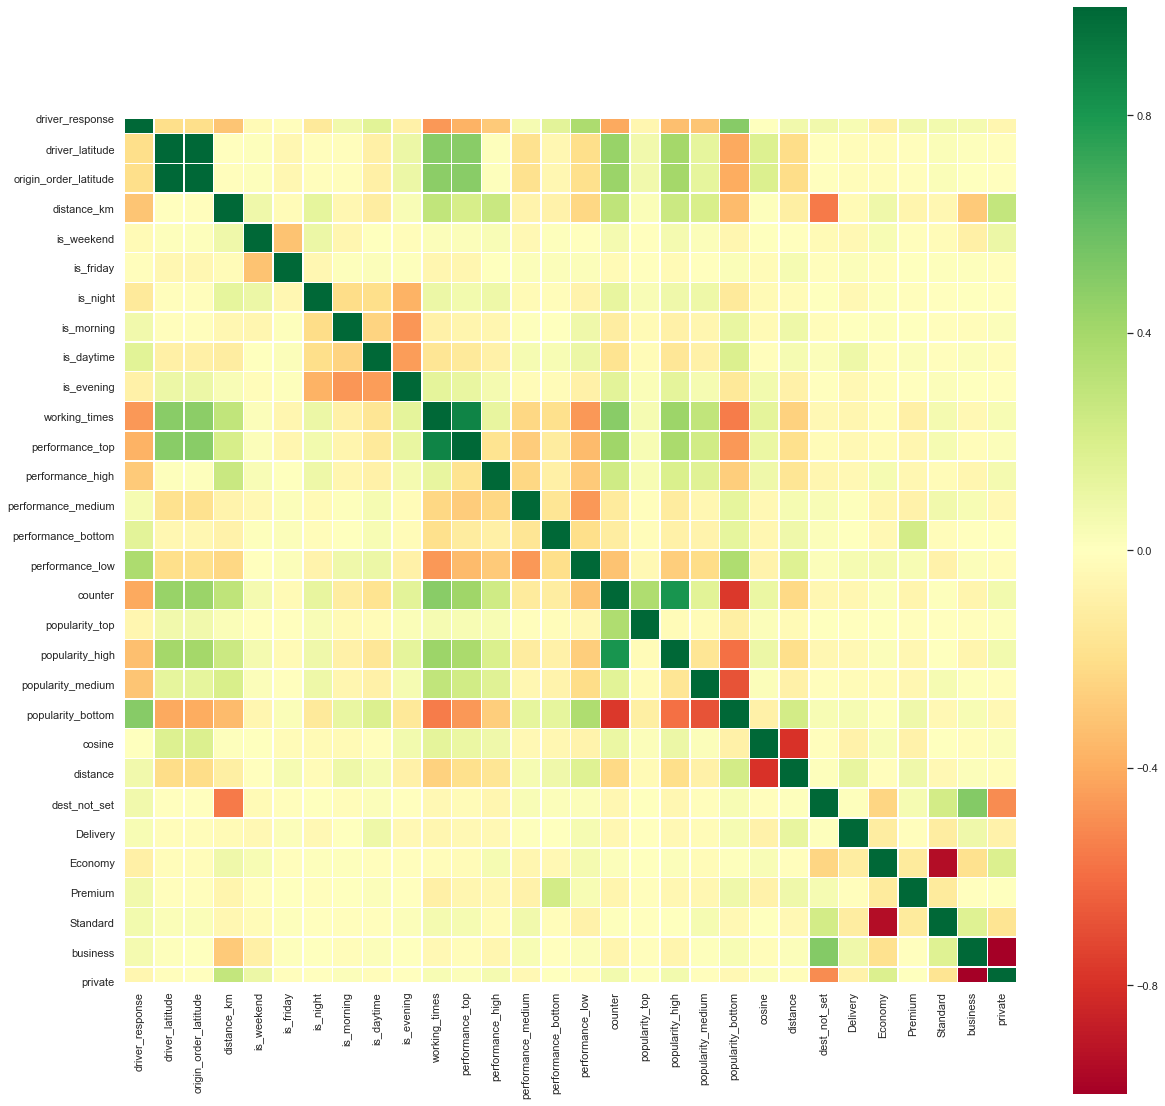

In [89]:
rcParams['figure.figsize'] = 20,20
sns.heatmap(cor_matrix, annot=False,linewidths=.5, square=True, cmap="RdYlGn")

In [90]:
# Посмотрим, у скольких элементов корреляция > 70% 
row = 0
for element in np.triu(cor_matrix, k = 1):
    row += 1
    place = 0
    for number in element:
        place+=1
        if abs(number) > 0.7: print(f'Номер строки {row}, элемент {place}: коэффициент корреляции {round(number,5)}')

Номер строки 2, элемент 3: коэффициент корреляции 0.99856
Номер строки 11, элемент 12: коэффициент корреляции 0.87832
Номер строки 17, элемент 19: коэффициент корреляции 0.81153
Номер строки 17, элемент 21: коэффициент корреляции -0.76573
Номер строки 22, элемент 23: коэффициент корреляции -0.78972
Номер строки 26, элемент 28: коэффициент корреляции -0.93978
Номер строки 29, элемент 30: коэффициент корреляции -1.0


Вывод: после преобразования данных имеем несколько признаков, у которых между собой высокий коэффициент корреляции:

**0.99856** : *driver_latitude и origin_order_latitude;*

**0.87832** : *working_times и performance_top;*

**0.81153** : *counter и popularity_high;*

**-0.76573** : *counter и popularity_bottom;*

**-0.78972** : *cosine и distance;*

**-0.93978** : *Economy и Standard;*

**-1.0** : *business и private.*

In [91]:
# Посмотрим feature_importances

output_y = model_df.driver_response
input_x = model_df.loc[:, 'driver_latitude':]

In [92]:
# Разделяю выборку на обучаемую и тестовую:
X_train, X_test, y_train, y_test = train_test_split(input_x, output_y, test_size=0.2, random_state=9)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Text(0.5, 0, 'Важность атрибутов')

Text(0, 0.5, 'Атрибуты')

Text(0.5, 1.0, 'Наиболее важные атрибуты')

No handles with labels found to put in legend.


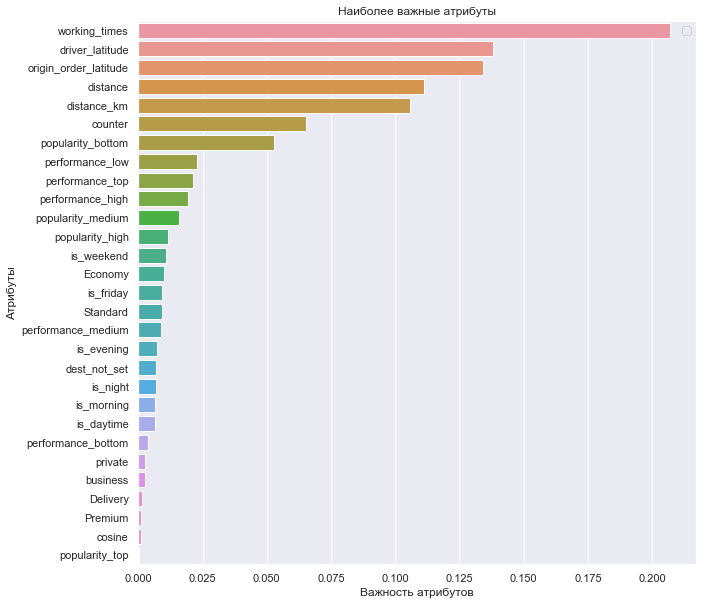

In [93]:
# создаем модель деревья решений
model=RandomForestClassifier(n_estimators=50)

# обучаем модель
model.fit(X_train,y_train)

headers = list(X_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

In [94]:
model.score(X_train,y_train) # coefficient of determination R^2 of the prediction

0.996344020043974

In [95]:
# смотрим качество предсказания классов
model_pred = model.predict(X_test)
print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82      9956
           1       0.79      0.87      0.83      9601

    accuracy                           0.82     19557
   macro avg       0.83      0.83      0.82     19557
weighted avg       0.83      0.82      0.82     19557



Для класса 0 "отрицательный driver_response" точность классификатора составляет 0.86 (86% положительных решений правильные), а полнота 0.78 (классификатор нашел 78% всех отрицательных откликов).

Для класса 1 "положительный driver_response" точность классификатора составляет 0.79 (79% положительных решений правильные), а полнота 0.87 (классификатор нашел 87% всех положительных откликов).